In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

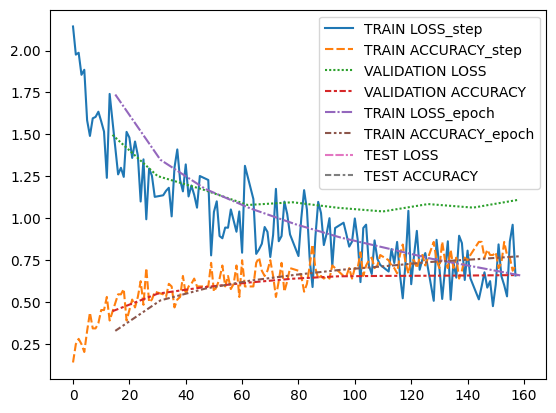

In [14]:
metrics = pd.read_csv("logs/lightning_logs/version_5/metrics.csv")
del metrics["step"]
del metrics["epoch"]
sns.lineplot(data=metrics)

In [15]:
from model import AlexNetLit
import cv2
import torch
import os

model = AlexNetLit.load_from_checkpoint("weights/alexnet.ckpt")
test_images = {i: cv2.imread(os.path.join("test_images", i)) for i in os.listdir("test_images")}

for i in test_images:
    test_images[i] = cv2.resize(test_images[i], (32, 32))
    test_images[i] = test_images[i].reshape(1, 32, 32, 3)
    test_images[i] = test_images[i].astype('float32') / 255.0
    test_images[i] = torch.from_numpy(test_images[i])
    test_images[i] = test_images[i].permute(0, 3, 1, 2)
    
    y_pred, feat = model(test_images[i])
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    print(f'Predicted class: {classes[torch.argmax(y_pred)]}')
    print(f'Expected class: {i.split(".")[0]}', end="\n\n")

Predicted class: bird
Expected class: bird

Predicted class: deer
Expected class: deer

Predicted class: frog
Expected class: frog

Predicted class: deer
Expected class: horse

